IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from numpy import array
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Train df


In [2]:
colnames = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
train_dfs = pd.read_csv('/content/drive/MyDrive/ADMHE_System_Load_2013-01-01_2015-12-31_training_15in_1out_2013-2015trn_2016tst.csv',names=colnames, header=None)

In [3]:
colnames = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
test_dfs = pd.read_csv("/content/drive/MyDrive/ADMHE_System_Load_2016-01-01_2016-12-31_testing_15in_1out_2013-2015trn_2016tst.csv",names=colnames, header=None)

Date column for train df


In [4]:
train_dfs['Datetime'] = pd.date_range(start='2013-1-9',end='2016-1-1',freq='H')[:-1]
train_dfs['Datetime']

0       2013-01-09 00:00:00
1       2013-01-09 01:00:00
2       2013-01-09 02:00:00
3       2013-01-09 03:00:00
4       2013-01-09 04:00:00
                ...        
26083   2015-12-31 19:00:00
26084   2015-12-31 20:00:00
26085   2015-12-31 21:00:00
26086   2015-12-31 22:00:00
26087   2015-12-31 23:00:00
Name: Datetime, Length: 26088, dtype: datetime64[ns]

Set date column as index

In [5]:
train_dfs.set_index('Datetime',inplace=True)
train_dfs

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
Datetime,,,,,,,,,,,,,,,,
2013-01-09 00:00:00,6615,6141,5525,5040,5011,6356,6033,5444,4846,4834,5718,5509,5029,4593,4598,5925
2013-01-09 01:00:00,6141,5525,5040,5011,4817,6033,5444,4846,4834,4658,5509,5029,4593,4598,4374,5427
2013-01-09 02:00:00,5525,5040,5011,4817,4685,5444,4846,4834,4658,4510,5029,4593,4598,4374,4246,5387
2013-01-09 03:00:00,5040,5011,4817,4685,4784,4846,4834,4658,4510,4554,4593,4598,4374,4246,4278,5207
2013-01-09 04:00:00,5011,4817,4685,4784,5321,4834,4658,4510,4554,4988,4598,4374,4246,4278,4591,5146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,7571,7888,7889,7711,7291,6611,7184,7242,7145,6710,6996,7592,7669,7492,6950,8937
2015-12-31 20:00:00,7888,7889,7711,7291,6690,7184,7242,7145,6710,6149,7592,7669,7492,6950,6239,8527
2015-12-31 21:00:00,7889,7711,7291,6690,6179,7242,7145,6710,6149,5701,7669,7492,6950,6239,5782,7695


Date column for test df

In [6]:
test_dfs['Datetime'] = pd.date_range(start='2016-1-9',end='2017-1-1',freq='H')[:-1]
test_dfs

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Datetime
0,6077,5629,5084,4611,4582,5540,5216,4764,4352,4317,6333,6057,5585,5120,5043,5172,2016-01-09 00:00:00
1,5629,5084,4611,4582,4405,5216,4764,4352,4317,4119,6057,5585,5120,5043,4799,4756,2016-01-09 01:00:00
2,5084,4611,4582,4405,4300,4764,4352,4317,4119,4026,5585,5120,5043,4799,4626,4680,2016-01-09 02:00:00
3,4611,4582,4405,4300,4366,4352,4317,4119,4026,4127,5120,5043,4799,4626,4640,4482,2016-01-09 03:00:00
4,4582,4405,4300,4366,4788,4317,4119,4026,4127,4498,5043,4799,4626,4640,4790,4334,2016-01-09 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,7819,8299,8302,7941,7269,7715,8061,8040,7837,7332,7159,7837,7901,7584,6957,8971,2016-12-31 19:00:00
8588,8299,8302,7941,7269,6776,8061,8040,7837,7332,6763,7837,7901,7584,6957,6348,8563,2016-12-31 20:00:00
8589,8302,7941,7269,6776,6395,8040,7837,7332,6763,6261,7901,7584,6957,6348,5947,7705,2016-12-31 21:00:00
8590,7941,7269,6776,6395,5779,7837,7332,6763,6261,5646,7584,6957,6348,5947,5414,6759,2016-12-31 22:00:00


Set date column as index

In [7]:
test_dfs.set_index('Datetime',inplace=True)

Concatenate the whole dataframe

In [8]:
whole_dfs = pd.concat([train_dfs,test_dfs],axis=0)
whole_dfs

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
Datetime,,,,,,,,,,,,,,,,
2013-01-09 00:00:00,6615,6141,5525,5040,5011,6356,6033,5444,4846,4834,5718,5509,5029,4593,4598,5925
2013-01-09 01:00:00,6141,5525,5040,5011,4817,6033,5444,4846,4834,4658,5509,5029,4593,4598,4374,5427
2013-01-09 02:00:00,5525,5040,5011,4817,4685,5444,4846,4834,4658,4510,5029,4593,4598,4374,4246,5387
2013-01-09 03:00:00,5040,5011,4817,4685,4784,4846,4834,4658,4510,4554,4593,4598,4374,4246,4278,5207
2013-01-09 04:00:00,5011,4817,4685,4784,5321,4834,4658,4510,4554,4988,4598,4374,4246,4278,4591,5146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,7819,8299,8302,7941,7269,7715,8061,8040,7837,7332,7159,7837,7901,7584,6957,8971
2016-12-31 20:00:00,8299,8302,7941,7269,6776,8061,8040,7837,7332,6763,7837,7901,7584,6957,6348,8563
2016-12-31 21:00:00,8302,7941,7269,6776,6395,8040,7837,7332,6763,6261,7901,7584,6957,6348,5947,7705


Rename the target column

In [9]:
whole_dfs.rename(columns={'P':'target'},inplace=True)

function to separate features from labels with window size = 24 hours


In [10]:
def split_sequence(df,window_size=24):
  df_np = df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_np)-window_size):
    row = [r for r in df_np[i:i+window_size]]
    X.append(row)
    label = df_np[i][-1]
    y.append(label)
  return np.array(X),np.array(y)

In [11]:
X,y = split_sequence(whole_dfs)
X.shape,y.shape

((34656, 24, 16), (34656,))

In [12]:
X[34655]

array([[7332, 6763, 6261, 5646, 5072, 7000, 6432, 5969, 5383, 4834, 7316,
        6762, 6188, 5445, 4866, 6395],
       [6763, 6261, 5646, 5072, 4997, 6432, 5969, 5383, 4834, 4795, 6762,
        6188, 5445, 4866, 4798, 5779],
       [6261, 5646, 5072, 4997, 4756, 5969, 5383, 4834, 4795, 4635, 6188,
        5445, 4866, 4798, 4584, 5232],
       [5646, 5072, 4997, 4756, 4676, 5383, 4834, 4795, 4635, 4532, 5445,
        4866, 4798, 4584, 4416, 5194],
       [5072, 4997, 4756, 4676, 4781, 4834, 4795, 4635, 4532, 4612, 4866,
        4798, 4584, 4416, 4442, 5005],
       [4997, 4756, 4676, 4781, 5058, 4795, 4635, 4532, 4612, 4987, 4798,
        4584, 4416, 4442, 4639, 4898],
       [4756, 4676, 4781, 5058, 5622, 4635, 4532, 4612, 4987, 5577, 4584,
        4416, 4442, 4639, 5030, 4932],
       [4676, 4781, 5058, 5622, 6243, 4532, 4612, 4987, 5577, 6193, 4416,
        4442, 4639, 5030, 5374, 5196],
       [4781, 5058, 5622, 6243, 6731, 4612, 4987, 5577, 6193, 6877, 4442,
        4639, 5030, 53

In [13]:
y[34655]

6395

Split the features and the labels in training and testing

In [14]:
X_train , y_train = X[:26088,:,:15],y[:26088]
X_train.shape,y_train.shape

((26088, 24, 15), (26088,))

In [15]:
X_test , y_test  = X[26088:,:,:15], y[26088:]
X_test.shape,y_test.shape

((8568, 24, 15), (8568,))

load the saved LSTM model

In [16]:
# load model
from tensorflow.keras.models import load_model
savedModel1=load_model(os.path.join('/content/drive/MyDrive/models','LSTM.h5'))
savedModel1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               172800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 193,001
Trainable params: 193,001
Non-trainable params: 0
_________________________________________________________________


Make predictions

In [17]:
test_predictions = savedModel1.predict(X_test)
test_predictions

268/268 [==============================] - 5s 5ms/step


array([[5295.5474],
       [4858.5894],
       [4746.403 ],
       ...,
       [7260.802 ],
       [6683.8564],
       [6246.4995]], dtype=float32)

In [18]:
len(test_predictions)

8568

Meta train data

In [19]:
meta_train = pd.read_excel('/content/drive/MyDrive/Actual Load - TRAINING_with_metadata.xlsx')
meta_train

,Actual Load - TRAINING,Year,Month,Day,Season,Week Day,Date
0,5925,2013,1,9,4,2,2013-01-09
1,5427,2013,1,9,4,2,2013-01-09
2,5387,2013,1,9,4,2,2013-01-09
3,5207,2013,1,9,4,2,2013-01-09
4,5146,2013,1,9,4,2,2013-01-09
...,...,...,...,...,...,...,...
26083,8937,2015,12,31,4,3,2015-12-31
26084,8527,2015,12,31,4,3,2015-12-31
26085,7695,2015,12,31,4,3,2015-12-31
26086,6712,2015,12,31,4,3,2015-12-31


Meta test data

In [20]:
meta_test = pd.read_excel('/content/drive/MyDrive/Actual Load - TESTING_with_metadata.xlsx')
meta_test

,Actual Load - TESTING,Year,Month,Day,Season,Week Day,Date
0,5172,2016,1,9,4,5,2016-01-09
1,4756,2016,1,9,4,5,2016-01-09
2,4680,2016,1,9,4,5,2016-01-09
3,4482,2016,1,9,4,5,2016-01-09
4,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...
8587,8971,2016,12,31,4,5,2016-12-31
8588,8563,2016,12,31,4,5,2016-12-31
8589,7705,2016,12,31,4,5,2016-12-31
8590,6759,2016,12,31,4,5,2016-12-31


In [21]:
meta_test.iloc[24]

Actual Load - TESTING                   4920
Year                                    2016
Month                                      1
Day                                       10
Season                                     4
Week Day                                   6
Date                     2016-01-10 00:00:00
Name: 24, dtype: object

In [22]:
meta_test.rename(columns={'Actual Load - TESTING':"actual"},inplace=True)
meta_test

,actual,Year,Month,Day,Season,Week Day,Date
0,5172,2016,1,9,4,5,2016-01-09
1,4756,2016,1,9,4,5,2016-01-09
2,4680,2016,1,9,4,5,2016-01-09
3,4482,2016,1,9,4,5,2016-01-09
4,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...
8587,8971,2016,12,31,4,5,2016-12-31
8588,8563,2016,12,31,4,5,2016-12-31
8589,7705,2016,12,31,4,5,2016-12-31
8590,6759,2016,12,31,4,5,2016-12-31


In [23]:
y_test

array([5172, 4756, 4680, ..., 7269, 6776, 6395])

In [24]:
test_predictions

array([[5295.5474],
       [4858.5894],
       [4746.403 ],
       ...,
       [7260.802 ],
       [6683.8564],
       [6246.4995]], dtype=float32)

In [25]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()})
test_results

,Test Predictions,Actuals
0,5295.547363,5172
1,4858.589355,4756
2,4746.402832,4680
3,4566.904785,4482
4,4391.417480,4334
...,...,...
8563,8201.016602,8302
8564,7865.099609,7941
8565,7260.801758,7269
8566,6683.856445,6776


In [26]:
test_results['Date'] = pd.date_range(start='2016-1-09',end='2016-12-31',freq='H')[:-1]
test_results

,Test Predictions,Actuals,Date
0,5295.547363,5172,2016-01-09 00:00:00
1,4858.589355,4756,2016-01-09 01:00:00
2,4746.402832,4680,2016-01-09 02:00:00
3,4566.904785,4482,2016-01-09 03:00:00
4,4391.417480,4334,2016-01-09 04:00:00
...,...,...,...
8563,8201.016602,8302,2016-12-30 19:00:00
8564,7865.099609,7941,2016-12-30 20:00:00
8565,7260.801758,7269,2016-12-30 21:00:00
8566,6683.856445,6776,2016-12-30 22:00:00


In [27]:
test_results.set_index('Date',inplace=True)
test_results

,Test Predictions,Actuals
Date,,
2016-01-09 00:00:00,5295.547363,5172
2016-01-09 01:00:00,4858.589355,4756
2016-01-09 02:00:00,4746.402832,4680
2016-01-09 03:00:00,4566.904785,4482
2016-01-09 04:00:00,4391.417480,4334
...,...,...
2016-12-30 19:00:00,8201.016602,8302
2016-12-30 20:00:00,7865.099609,7941
2016-12-30 21:00:00,7260.801758,7269


In [28]:
test_results['diff']=(test_results['Test Predictions']-test_results['Actuals']).abs()

In [29]:
test_results

,Test Predictions,Actuals,diff
Date,,,
2016-01-09 00:00:00,5295.547363,5172,123.547363
2016-01-09 01:00:00,4858.589355,4756,102.589355
2016-01-09 02:00:00,4746.402832,4680,66.402832
2016-01-09 03:00:00,4566.904785,4482,84.904785
2016-01-09 04:00:00,4391.417480,4334,57.417480
...,...,...,...
2016-12-30 19:00:00,8201.016602,8302,100.983398
2016-12-30 20:00:00,7865.099609,7941,75.900391
2016-12-30 21:00:00,7260.801758,7269,8.198242


In [30]:
meta_train = pd.read_excel('/content/drive/MyDrive/Actual Load - TRAINING_with_metadata.xlsx')
meta_train

,Actual Load - TRAINING,Year,Month,Day,Season,Week Day,Date
0,5925,2013,1,9,4,2,2013-01-09
1,5427,2013,1,9,4,2,2013-01-09
2,5387,2013,1,9,4,2,2013-01-09
3,5207,2013,1,9,4,2,2013-01-09
4,5146,2013,1,9,4,2,2013-01-09
...,...,...,...,...,...,...,...
26083,8937,2015,12,31,4,3,2015-12-31
26084,8527,2015,12,31,4,3,2015-12-31
26085,7695,2015,12,31,4,3,2015-12-31
26086,6712,2015,12,31,4,3,2015-12-31


In [31]:
meta_test = pd.read_excel('/content/drive/MyDrive/Actual Load - TESTING_with_metadata.xlsx')
meta_test = meta_test.iloc[:8568]

In [32]:
meta_test.rename(columns={'Actual Load - TESTING':"actual"},inplace=True)
meta_test

,actual,Year,Month,Day,Season,Week Day,Date
0,5172,2016,1,9,4,5,2016-01-09
1,4756,2016,1,9,4,5,2016-01-09
2,4680,2016,1,9,4,5,2016-01-09
3,4482,2016,1,9,4,5,2016-01-09
4,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...
8563,8302,2016,12,30,4,4,2016-12-30
8564,7941,2016,12,30,4,4,2016-12-30
8565,7269,2016,12,30,4,4,2016-12-30
8566,6776,2016,12,30,4,4,2016-12-30


In [33]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()})
test_results

,Test Predictions,Actuals
0,5295.547363,5172
1,4858.589355,4756
2,4746.402832,4680
3,4566.904785,4482
4,4391.417480,4334
...,...,...
8563,8201.016602,8302
8564,7865.099609,7941
8565,7260.801758,7269
8566,6683.856445,6776


In [34]:
test_results['Date'] = pd.date_range(start='2016-1-09',end='2016-12-31',freq='H')[:-1]
test_results

,Test Predictions,Actuals,Date
0,5295.547363,5172,2016-01-09 00:00:00
1,4858.589355,4756,2016-01-09 01:00:00
2,4746.402832,4680,2016-01-09 02:00:00
3,4566.904785,4482,2016-01-09 03:00:00
4,4391.417480,4334,2016-01-09 04:00:00
...,...,...,...
8563,8201.016602,8302,2016-12-30 19:00:00
8564,7865.099609,7941,2016-12-30 20:00:00
8565,7260.801758,7269,2016-12-30 21:00:00
8566,6683.856445,6776,2016-12-30 22:00:00


In [35]:
test_results.set_index('Date',inplace=True)
test_results

,Test Predictions,Actuals
Date,,
2016-01-09 00:00:00,5295.547363,5172
2016-01-09 01:00:00,4858.589355,4756
2016-01-09 02:00:00,4746.402832,4680
2016-01-09 03:00:00,4566.904785,4482
2016-01-09 04:00:00,4391.417480,4334
...,...,...
2016-12-30 19:00:00,8201.016602,8302
2016-12-30 20:00:00,7865.099609,7941
2016-12-30 21:00:00,7260.801758,7269


In [36]:
test_results['diff']=(test_results['Test Predictions']-test_results['Actuals']).abs()

In [37]:
test_results.index

DatetimeIndex(['2016-01-09 00:00:00', '2016-01-09 01:00:00',
               '2016-01-09 02:00:00', '2016-01-09 03:00:00',
               '2016-01-09 04:00:00', '2016-01-09 05:00:00',
               '2016-01-09 06:00:00', '2016-01-09 07:00:00',
               '2016-01-09 08:00:00', '2016-01-09 09:00:00',
               ...
               '2016-12-30 14:00:00', '2016-12-30 15:00:00',
               '2016-12-30 16:00:00', '2016-12-30 17:00:00',
               '2016-12-30 18:00:00', '2016-12-30 19:00:00',
               '2016-12-30 20:00:00', '2016-12-30 21:00:00',
               '2016-12-30 22:00:00', '2016-12-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=8568, freq=None)

In [38]:
deep1 = pd.merge(test_results,meta_test,on=test_results.index)
deep1

,key_0,Test Predictions,Actuals,diff,actual,Year,Month,Day,Season,Week Day,Date
0,2016-01-09 00:00:00,5295.547363,5172,123.547363,5172,2016,1,9,4,5,2016-01-09
1,2016-01-09 01:00:00,4858.589355,4756,102.589355,4756,2016,1,9,4,5,2016-01-09
2,2016-01-09 02:00:00,4746.402832,4680,66.402832,4680,2016,1,9,4,5,2016-01-09
3,2016-01-09 03:00:00,4566.904785,4482,84.904785,4482,2016,1,9,4,5,2016-01-09
4,2016-01-09 04:00:00,4391.417480,4334,57.417480,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,8201.016602,8302,100.983398,8302,2016,12,30,4,4,2016-12-30
8564,2016-12-30 20:00:00,7865.099609,7941,75.900391,7941,2016,12,30,4,4,2016-12-30
8565,2016-12-30 21:00:00,7260.801758,7269,8.198242,7269,2016,12,30,4,4,2016-12-30
8566,2016-12-30 22:00:00,6683.856445,6776,92.143555,6776,2016,12,30,4,4,2016-12-30


In [39]:
deep1.drop(columns=['actual','Date'],axis=1,inplace=True)

In [40]:
deep1.rename(columns={'key_0':'Date'},inplace=True)

In [41]:
deep1['Hour']=deep1['Date'].dt.hour

In [42]:
deep1.set_index('Date',inplace=True)
deep1

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 00:00:00,5295.547363,5172,123.547363,2016,1,9,4,5,0
2016-01-09 01:00:00,4858.589355,4756,102.589355,2016,1,9,4,5,1
2016-01-09 02:00:00,4746.402832,4680,66.402832,2016,1,9,4,5,2
2016-01-09 03:00:00,4566.904785,4482,84.904785,2016,1,9,4,5,3
2016-01-09 04:00:00,4391.417480,4334,57.417480,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,8201.016602,8302,100.983398,2016,12,30,4,4,19
2016-12-30 20:00:00,7865.099609,7941,75.900391,2016,12,30,4,4,20
2016-12-30 21:00:00,7260.801758,7269,8.198242,2016,12,30,4,4,21


In [43]:
deep1[deep1['diff']>100]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 00:00:00,5295.547363,5172,123.547363,2016,1,9,4,5,0
2016-01-09 01:00:00,4858.589355,4756,102.589355,2016,1,9,4,5,1
2016-01-09 09:00:00,5220.423828,5051,169.423828,2016,1,9,4,5,9
2016-01-09 10:00:00,5371.145508,4940,431.145508,2016,1,9,4,5,10
2016-01-09 11:00:00,5562.445312,4845,717.445312,2016,1,9,4,5,11
...,...,...,...,...,...,...,...,...,...
2016-12-30 16:00:00,7028.701172,7435,406.298828,2016,12,30,4,4,16
2016-12-30 17:00:00,7608.486816,7819,210.513184,2016,12,30,4,4,17
2016-12-30 18:00:00,8153.066895,8299,145.933105,2016,12,30,4,4,18


mae>100=59,84%

In [44]:
deep1[deep1['diff']>200]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 10:00:00,5371.145508,4940,431.145508,2016,1,9,4,5,10
2016-01-09 11:00:00,5562.445312,4845,717.445312,2016,1,9,4,5,11
2016-01-09 12:00:00,5729.638672,4850,879.638672,2016,1,9,4,5,12
2016-01-09 13:00:00,5704.048828,4978,726.048828,2016,1,9,4,5,13
2016-01-09 14:00:00,5594.722656,4967,627.722656,2016,1,9,4,5,14
...,...,...,...,...,...,...,...,...,...
2016-12-30 13:00:00,5903.484863,6684,780.515137,2016,12,30,4,4,13
2016-12-30 14:00:00,5938.419922,6647,708.580078,2016,12,30,4,4,14
2016-12-30 15:00:00,6470.477539,7125,654.522461,2016,12,30,4,4,15


mae>200=32,98%

In [45]:
deep1[deep1['diff']>300]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 10:00:00,5371.145508,4940,431.145508,2016,1,9,4,5,10
2016-01-09 11:00:00,5562.445312,4845,717.445312,2016,1,9,4,5,11
2016-01-09 12:00:00,5729.638672,4850,879.638672,2016,1,9,4,5,12
2016-01-09 13:00:00,5704.048828,4978,726.048828,2016,1,9,4,5,13
2016-01-09 14:00:00,5594.722656,4967,627.722656,2016,1,9,4,5,14
...,...,...,...,...,...,...,...,...,...
2016-12-30 12:00:00,5895.833984,6654,758.166016,2016,12,30,4,4,12
2016-12-30 13:00:00,5903.484863,6684,780.515137,2016,12,30,4,4,13
2016-12-30 14:00:00,5938.419922,6647,708.580078,2016,12,30,4,4,14


mae>300=17,94%

In [46]:
deep1[deep1['diff']>400]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 10:00:00,5371.145508,4940,431.145508,2016,1,9,4,5,10
2016-01-09 11:00:00,5562.445312,4845,717.445312,2016,1,9,4,5,11
2016-01-09 12:00:00,5729.638672,4850,879.638672,2016,1,9,4,5,12
2016-01-09 13:00:00,5704.048828,4978,726.048828,2016,1,9,4,5,13
2016-01-09 14:00:00,5594.722656,4967,627.722656,2016,1,9,4,5,14
...,...,...,...,...,...,...,...,...,...
2016-12-30 12:00:00,5895.833984,6654,758.166016,2016,12,30,4,4,12
2016-12-30 13:00:00,5903.484863,6684,780.515137,2016,12,30,4,4,13
2016-12-30 14:00:00,5938.419922,6647,708.580078,2016,12,30,4,4,14


mae>400=10,25%

In [47]:
deep1[deep1['diff']>500]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 11:00:00,5562.445312,4845,717.445312,2016,1,9,4,5,11
2016-01-09 12:00:00,5729.638672,4850,879.638672,2016,1,9,4,5,12
2016-01-09 13:00:00,5704.048828,4978,726.048828,2016,1,9,4,5,13
2016-01-09 14:00:00,5594.722656,4967,627.722656,2016,1,9,4,5,14
2016-01-10 07:00:00,4771.225586,4243,528.225586,2016,1,10,4,6,7
...,...,...,...,...,...,...,...,...,...
2016-12-30 11:00:00,5913.999512,6710,796.000488,2016,12,30,4,4,11
2016-12-30 12:00:00,5895.833984,6654,758.166016,2016,12,30,4,4,12
2016-12-30 13:00:00,5903.484863,6684,780.515137,2016,12,30,4,4,13


mae>500=6,30%

In [48]:
a = deep1.groupby(['Season'])
a.first()

,Test Predictions,Actuals,diff,Year,Month,Day,Week Day,Hour
Season,,,,,,,,
1,4618.477539,4514,104.477539,2016,3,1,1,0
2,4675.805176,4631,44.805176,2016,6,1,2,0
3,5699.143555,5791,91.856445,2016,9,1,3,0
4,5295.547363,5172,123.547363,2016,1,9,5,0


<AxesSubplot:xlabel='Season'>

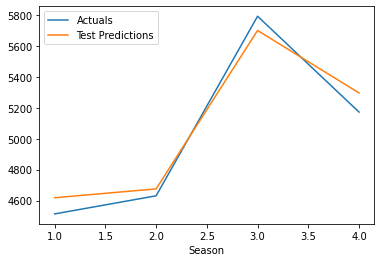

In [49]:
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

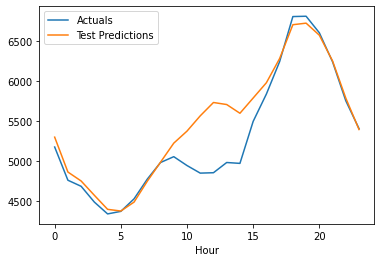

In [50]:
a = deep1.groupby('Hour')
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Week Day'>

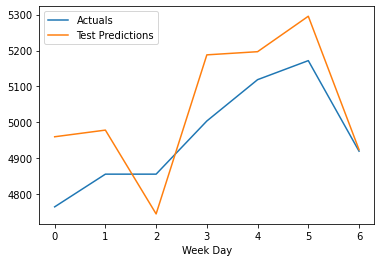

In [51]:
a = deep1.groupby('Week Day')
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

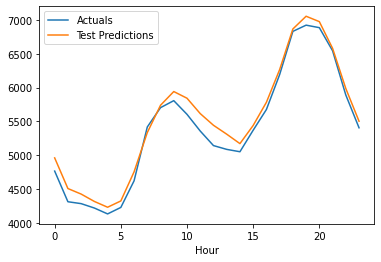

In [52]:
#winter weakday
deep1.loc[(deep1.Season==4) & ((deep1['Week Day']==0) | (deep1['Week Day'] ==1) | (deep1['Week Day'] ==2) | (deep1['Week Day'] ==3) | (deep1['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

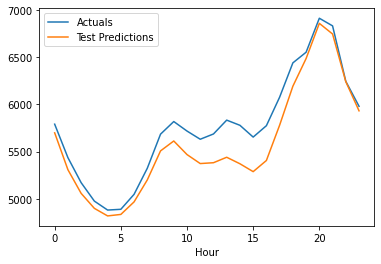

In [53]:
# autumn weakday
deep1.loc[(deep1.Season==3) & ((deep1['Week Day']==0) | (deep1['Week Day'] ==1) | (deep1['Week Day'] ==2) | (deep1['Week Day'] ==3) | (deep1['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

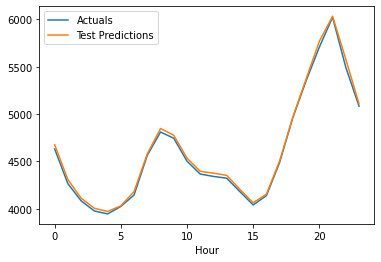

In [54]:
# summer weekday
deep1.loc[(deep1.Season==2) & ((deep1['Week Day']==0) | (deep1['Week Day'] ==1) | (deep1['Week Day'] ==2) | (deep1['Week Day'] ==3) | (deep1['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

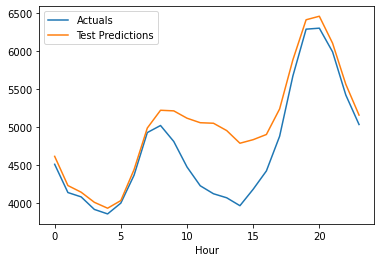

In [55]:
# spring weekday
deep1.loc[(deep1.Season==1) & ((deep1['Week Day']==0) | (deep1['Week Day'] ==1) | (deep1['Week Day'] ==2) | (deep1['Week Day'] ==3) | (deep1['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

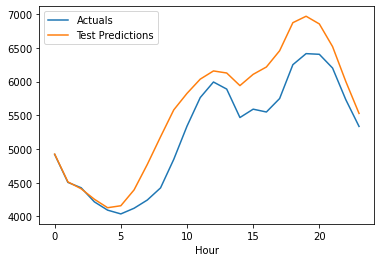

In [56]:
# winter sundays
deep1.loc[(deep1.Season==4) & (deep1['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

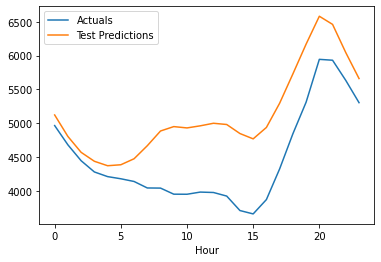

In [57]:
# autumn sundays
deep1.loc[(deep1.Season==3) & (deep1['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

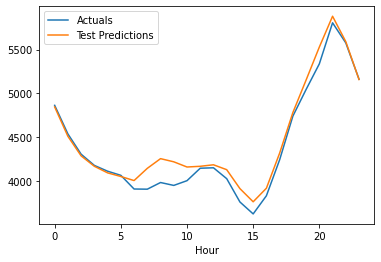

In [58]:
# summer sundays
deep1.loc[(deep1.Season==2) & (deep1['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

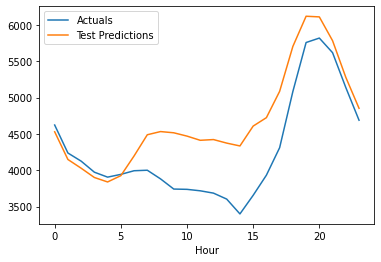

In [59]:
# spring sundays
deep1.loc[(deep1.Season==1) & (deep1['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

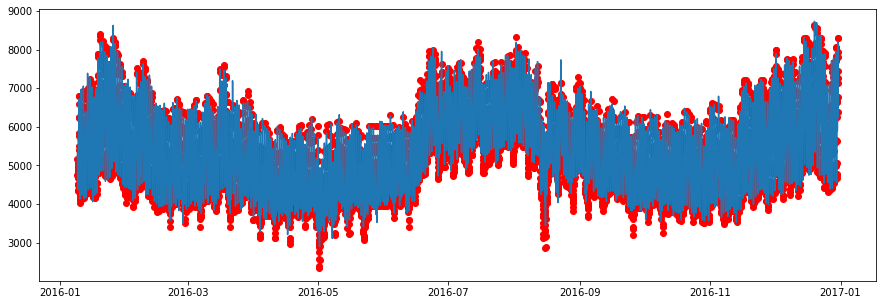

In [60]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index,test_results.Actuals,color='r')
fig = plt.plot(test_results['Test Predictions'])

In [61]:
deep_lstm=deep1.copy()

In [62]:
deep_lstm = deep_lstm.reset_index()
deep_lstm

,Date,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
0,2016-01-09 00:00:00,5295.547363,5172,123.547363,2016,1,9,4,5,0
1,2016-01-09 01:00:00,4858.589355,4756,102.589355,2016,1,9,4,5,1
2,2016-01-09 02:00:00,4746.402832,4680,66.402832,2016,1,9,4,5,2
3,2016-01-09 03:00:00,4566.904785,4482,84.904785,2016,1,9,4,5,3
4,2016-01-09 04:00:00,4391.417480,4334,57.417480,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,8201.016602,8302,100.983398,2016,12,30,4,4,19
8564,2016-12-30 20:00:00,7865.099609,7941,75.900391,2016,12,30,4,4,20
8565,2016-12-30 21:00:00,7260.801758,7269,8.198242,2016,12,30,4,4,21
8566,2016-12-30 22:00:00,6683.856445,6776,92.143555,2016,12,30,4,4,22


In [63]:
deep_lstm[deep_lstm['Date']=='2016-08-15 00:00:00']['Hour']

5256    0
Name: Hour, dtype: int64

In [64]:
deep_lstm[deep_lstm['Date']=='2016-08-15 23:00:00']['Hour']

5279    23
Name: Hour, dtype: int64

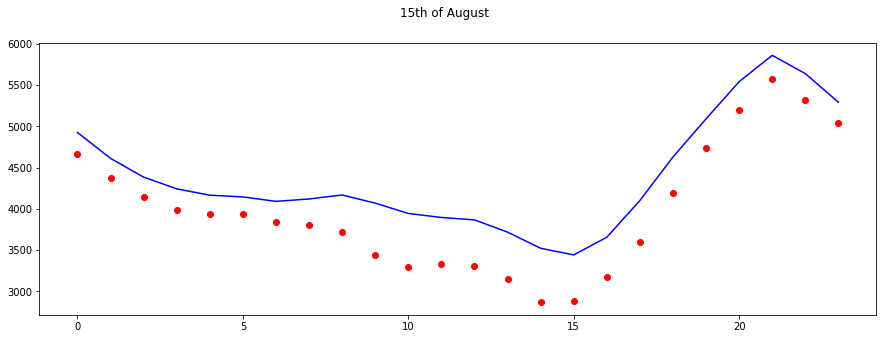

In [65]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter([i for i in range(0,24)],deep_lstm.iloc[5256:5280]['Actuals'], color='r')
fig = plt.plot([i for i in range(0,24)],deep_lstm.iloc[5256:5280]['Test Predictions'],color='b')
#ax.set_xbound(lower=res.iloc[5256]['Hour'],upper=res.iloc[5279]['Hour'])
plot = plt.suptitle('15th of August')

In [66]:
deep_lstm[deep_lstm['Date']=='2016-12-25 00:00:00']['Hour']

8424    0
Name: Hour, dtype: int64

In [67]:
deep_lstm[deep_lstm['Date']=='2016-12-25 23:00:00']['Hour']

8447    23
Name: Hour, dtype: int64

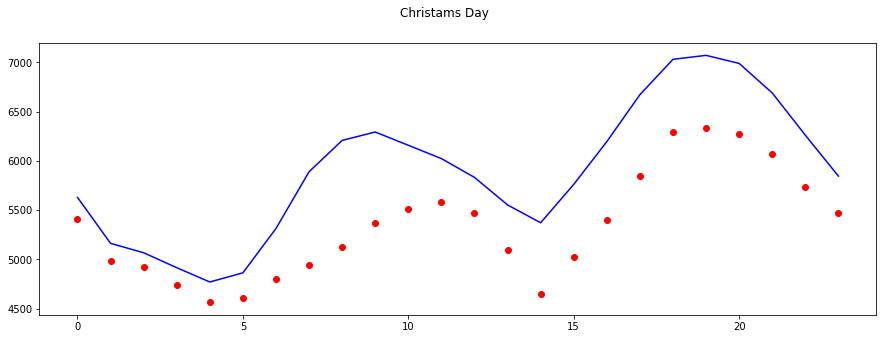

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter([i for i in range(0,24)],deep_lstm.iloc[8424:8448]['Actuals'], color='r')
fig = plt.plot([i for i in range(0,24)],deep_lstm.iloc[8424:8448]['Test Predictions'],color='b')
#ax.set_xbound(lower=deep_lstm.iloc[8424]['Hour'],upper=deep_lstm.iloc[8447]['Hour'])
plot = plt.suptitle('Christams Day')

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
mae_lstm = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])
mae_lstm

184.26980385660124

In [70]:
savedModel2=load_model(os.path.join('/content/drive/MyDrive/models','CNN-LSTM.h5'))
savedModel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 64)            2944      
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 640)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 200)           

In [71]:
test_predictions = savedModel2.predict(X_test)
test_predictions

268/268 [==============================] - 5s 2ms/step


array([[[5222.7217]],

       [[4794.877 ]],

       [[4612.1396]],

       ...,

       [[7097.4883]],

       [[6435.1016]],

       [[6043.8467]]], dtype=float32)

In [72]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()})
test_results

,Test Predictions,Actuals
0,5222.721680,5172
1,4794.876953,4756
2,4612.139648,4680
3,4457.208008,4482
4,4319.224609,4334
...,...,...
8563,8064.922363,8302
8564,7714.501465,7941
8565,7097.488281,7269
8566,6435.101562,6776


In [73]:
test_results['Date'] = pd.date_range(start='2016-1-09',end='2016-12-31',freq='H')[:-1]
test_results

,Test Predictions,Actuals,Date
0,5222.721680,5172,2016-01-09 00:00:00
1,4794.876953,4756,2016-01-09 01:00:00
2,4612.139648,4680,2016-01-09 02:00:00
3,4457.208008,4482,2016-01-09 03:00:00
4,4319.224609,4334,2016-01-09 04:00:00
...,...,...,...
8563,8064.922363,8302,2016-12-30 19:00:00
8564,7714.501465,7941,2016-12-30 20:00:00
8565,7097.488281,7269,2016-12-30 21:00:00
8566,6435.101562,6776,2016-12-30 22:00:00


In [74]:
test_results.set_index('Date',inplace=True)
test_results

,Test Predictions,Actuals
Date,,
2016-01-09 00:00:00,5222.721680,5172
2016-01-09 01:00:00,4794.876953,4756
2016-01-09 02:00:00,4612.139648,4680
2016-01-09 03:00:00,4457.208008,4482
2016-01-09 04:00:00,4319.224609,4334
...,...,...
2016-12-30 19:00:00,8064.922363,8302
2016-12-30 20:00:00,7714.501465,7941
2016-12-30 21:00:00,7097.488281,7269


In [75]:
deep2 = pd.merge(test_results,meta_test,on=test_results.index)
deep2

,key_0,Test Predictions,Actuals,actual,Year,Month,Day,Season,Week Day,Date
0,2016-01-09 00:00:00,5222.721680,5172,5172,2016,1,9,4,5,2016-01-09
1,2016-01-09 01:00:00,4794.876953,4756,4756,2016,1,9,4,5,2016-01-09
2,2016-01-09 02:00:00,4612.139648,4680,4680,2016,1,9,4,5,2016-01-09
3,2016-01-09 03:00:00,4457.208008,4482,4482,2016,1,9,4,5,2016-01-09
4,2016-01-09 04:00:00,4319.224609,4334,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,8064.922363,8302,8302,2016,12,30,4,4,2016-12-30
8564,2016-12-30 20:00:00,7714.501465,7941,7941,2016,12,30,4,4,2016-12-30
8565,2016-12-30 21:00:00,7097.488281,7269,7269,2016,12,30,4,4,2016-12-30
8566,2016-12-30 22:00:00,6435.101562,6776,6776,2016,12,30,4,4,2016-12-30


In [76]:
deep2.drop(columns=['actual','Date'],axis=1,inplace=True)

In [77]:
deep2.rename(columns={'key_0':'Date'},inplace=True)

In [78]:
deep2['Hour']=deep2['Date'].dt.hour

In [79]:
deep2.set_index('Date',inplace=True)
deep2

,Test Predictions,Actuals,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,
2016-01-09 00:00:00,5222.721680,5172,2016,1,9,4,5,0
2016-01-09 01:00:00,4794.876953,4756,2016,1,9,4,5,1
2016-01-09 02:00:00,4612.139648,4680,2016,1,9,4,5,2
2016-01-09 03:00:00,4457.208008,4482,2016,1,9,4,5,3
2016-01-09 04:00:00,4319.224609,4334,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,8064.922363,8302,2016,12,30,4,4,19
2016-12-30 20:00:00,7714.501465,7941,2016,12,30,4,4,20
2016-12-30 21:00:00,7097.488281,7269,2016,12,30,4,4,21


In [80]:
test_results['diff']=(test_results['Test Predictions']-test_results['Actuals']).abs()

In [81]:
deep2 = pd.merge(test_results,meta_test,on=test_results.index)
deep2

,key_0,Test Predictions,Actuals,diff,actual,Year,Month,Day,Season,Week Day,Date
0,2016-01-09 00:00:00,5222.721680,5172,50.721680,5172,2016,1,9,4,5,2016-01-09
1,2016-01-09 01:00:00,4794.876953,4756,38.876953,4756,2016,1,9,4,5,2016-01-09
2,2016-01-09 02:00:00,4612.139648,4680,67.860352,4680,2016,1,9,4,5,2016-01-09
3,2016-01-09 03:00:00,4457.208008,4482,24.791992,4482,2016,1,9,4,5,2016-01-09
4,2016-01-09 04:00:00,4319.224609,4334,14.775391,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,8064.922363,8302,237.077637,8302,2016,12,30,4,4,2016-12-30
8564,2016-12-30 20:00:00,7714.501465,7941,226.498535,7941,2016,12,30,4,4,2016-12-30
8565,2016-12-30 21:00:00,7097.488281,7269,171.511719,7269,2016,12,30,4,4,2016-12-30
8566,2016-12-30 22:00:00,6435.101562,6776,340.898438,6776,2016,12,30,4,4,2016-12-30


In [82]:
deep2.drop(columns=['actual','Date'],axis=1,inplace=True)
deep2.rename(columns={'key_0':'Date'},inplace=True)
deep2['Hour']=deep2['Date'].dt.hour
deep2.set_index('Date',inplace=True)
deep2

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 00:00:00,5222.721680,5172,50.721680,2016,1,9,4,5,0
2016-01-09 01:00:00,4794.876953,4756,38.876953,2016,1,9,4,5,1
2016-01-09 02:00:00,4612.139648,4680,67.860352,2016,1,9,4,5,2
2016-01-09 03:00:00,4457.208008,4482,24.791992,2016,1,9,4,5,3
2016-01-09 04:00:00,4319.224609,4334,14.775391,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,8064.922363,8302,237.077637,2016,12,30,4,4,19
2016-12-30 20:00:00,7714.501465,7941,226.498535,2016,12,30,4,4,20
2016-12-30 21:00:00,7097.488281,7269,171.511719,2016,12,30,4,4,21


In [83]:
deep2[deep2['diff']>100]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 06:00:00,4413.888184,4523,109.111816,2016,1,9,4,5,6
2016-01-09 07:00:00,4638.098633,4770,131.901367,2016,1,9,4,5,7
2016-01-09 08:00:00,4810.061035,4978,167.938965,2016,1,9,4,5,8
2016-01-09 10:00:00,5109.043457,4940,169.043457,2016,1,9,4,5,10
2016-01-09 11:00:00,5170.233887,4845,325.233887,2016,1,9,4,5,11
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,8064.922363,8302,237.077637,2016,12,30,4,4,19
2016-12-30 20:00:00,7714.501465,7941,226.498535,2016,12,30,4,4,20
2016-12-30 21:00:00,7097.488281,7269,171.511719,2016,12,30,4,4,21


mae>100=65,52%

In [84]:
deep2[deep2['diff']>200]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 11:00:00,5170.233887,4845,325.233887,2016,1,9,4,5,11
2016-01-09 12:00:00,5239.807129,4850,389.807129,2016,1,9,4,5,12
2016-01-09 13:00:00,5247.040527,4978,269.040527,2016,1,9,4,5,13
2016-01-09 16:00:00,5562.574707,5836,273.425293,2016,1,9,4,5,16
2016-01-09 17:00:00,5967.048340,6242,274.951660,2016,1,9,4,5,17
...,...,...,...,...,...,...,...,...,...
2016-12-30 18:00:00,7988.387695,8299,310.612305,2016,12,30,4,4,18
2016-12-30 19:00:00,8064.922363,8302,237.077637,2016,12,30,4,4,19
2016-12-30 20:00:00,7714.501465,7941,226.498535,2016,12,30,4,4,20


mae>200 = 40,95%

In [85]:
deep2[deep2['diff']>300]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 11:00:00,5170.233887,4845,325.233887,2016,1,9,4,5,11
2016-01-09 12:00:00,5239.807129,4850,389.807129,2016,1,9,4,5,12
2016-01-09 18:00:00,6369.203613,6806,436.796387,2016,1,9,4,5,18
2016-01-10 08:00:00,4861.008789,4423,438.008789,2016,1,10,4,6,8
2016-01-10 09:00:00,5247.639648,4847,400.639648,2016,1,10,4,6,9
...,...,...,...,...,...,...,...,...,...
2016-12-30 15:00:00,6394.116211,7125,730.883789,2016,12,30,4,4,15
2016-12-30 16:00:00,6875.649902,7435,559.350098,2016,12,30,4,4,16
2016-12-30 18:00:00,7988.387695,8299,310.612305,2016,12,30,4,4,18


mae>300 = 24,86%

In [86]:
deep2[deep2['diff']>400]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 18:00:00,6369.203613,6806,436.796387,2016,1,9,4,5,18
2016-01-10 08:00:00,4861.008789,4423,438.008789,2016,1,10,4,6,8
2016-01-10 09:00:00,5247.639648,4847,400.639648,2016,1,10,4,6,9
2016-01-12 07:00:00,4928.317383,5365,436.682617,2016,1,12,4,1,7
2016-01-12 08:00:00,5031.348633,5542,510.651367,2016,1,12,4,1,8
...,...,...,...,...,...,...,...,...,...
2016-12-30 12:00:00,5815.051758,6654,838.948242,2016,12,30,4,4,12
2016-12-30 13:00:00,5778.602539,6684,905.397461,2016,12,30,4,4,13
2016-12-30 14:00:00,5813.701172,6647,833.298828,2016,12,30,4,4,14


mae>400=15,37%

In [87]:
deep2[deep2['diff']>500]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-12 08:00:00,5031.348633,5542,510.651367,2016,1,12,4,1,8
2016-01-12 09:00:00,4881.310547,5535,653.689453,2016,1,12,4,1,9
2016-01-12 18:00:00,6065.216309,6722,656.783691,2016,1,12,4,1,18
2016-01-12 19:00:00,6271.811035,6793,521.188965,2016,1,12,4,1,19
2016-01-12 20:00:00,6217.190430,6775,557.809570,2016,1,12,4,1,20
...,...,...,...,...,...,...,...,...,...
2016-12-30 12:00:00,5815.051758,6654,838.948242,2016,12,30,4,4,12
2016-12-30 13:00:00,5778.602539,6684,905.397461,2016,12,30,4,4,13
2016-12-30 14:00:00,5813.701172,6647,833.298828,2016,12,30,4,4,14


mae>500=9,26%

In [88]:
a = deep2.groupby(['Season'])
a.first()

,Test Predictions,Actuals,diff,Year,Month,Day,Week Day,Hour
Season,,,,,,,,
1,4501.096680,4514,12.903320,2016,3,1,1,0
2,4601.850098,4631,29.149902,2016,6,1,2,0
3,5547.046387,5791,243.953613,2016,9,1,3,0
4,5222.721680,5172,50.721680,2016,1,9,5,0


<AxesSubplot:xlabel='Season'>

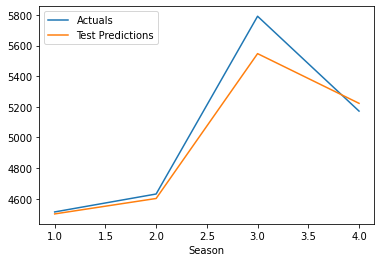

In [89]:
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

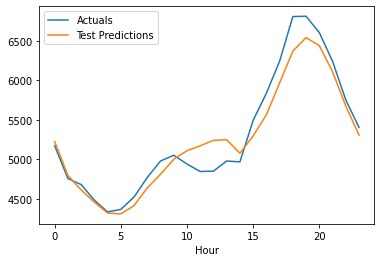

In [90]:
a = deep2.groupby('Hour')
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Week Day'>

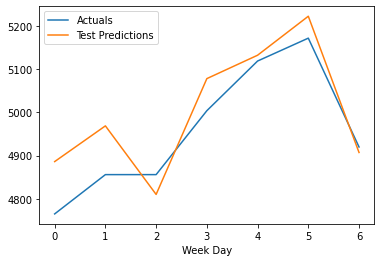

In [91]:
a = deep2.groupby('Week Day')
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

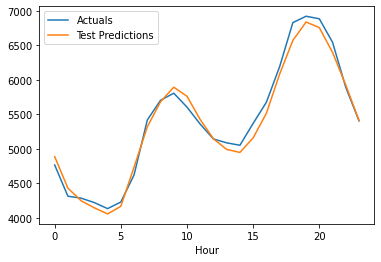

In [92]:
#winter weakday
deep2.loc[(deep2.Season==4) & ((deep2['Week Day']==0) | (deep2['Week Day'] ==1) | (deep2['Week Day'] ==2) | (deep2['Week Day'] ==3) | (deep2['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

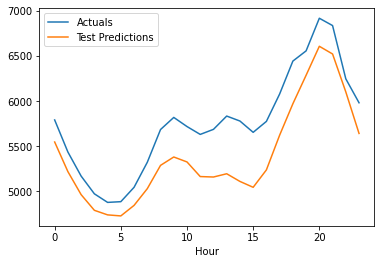

In [93]:
# autumn weakday
deep2.loc[(deep2.Season==3) & ((deep2['Week Day']==0) | (deep2['Week Day'] ==1) | (deep2['Week Day'] ==2) | (deep2['Week Day'] ==3) | (deep2['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

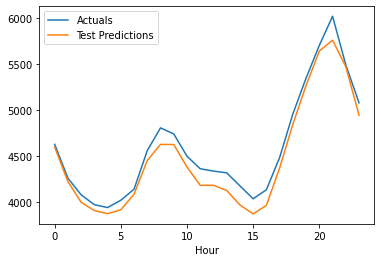

In [94]:
# summer weekday
deep2.loc[(deep2.Season==2) & ((deep2['Week Day']==0) | (deep2['Week Day'] ==1) | (deep2['Week Day'] ==2) | (deep2['Week Day'] ==3) | (deep2['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

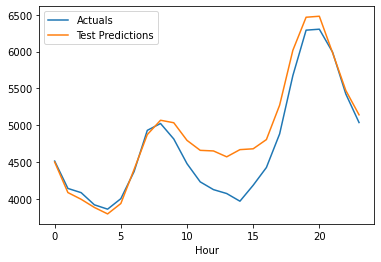

In [95]:
# spring weekday
deep2.loc[(deep2.Season==1) & ((deep2['Week Day']==0) | (deep2['Week Day'] ==1) | (deep2['Week Day'] ==2) | (deep2['Week Day'] ==3) | (deep2['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

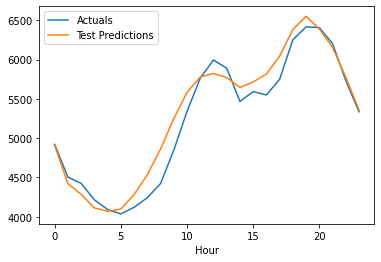

In [96]:
# winter sundays
deep2.loc[(deep2.Season==4) & (deep2['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

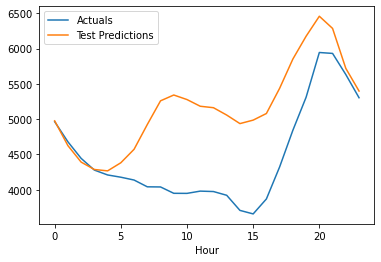

In [97]:
# autumn sundays
deep2.loc[(deep2.Season==3) & (deep2['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

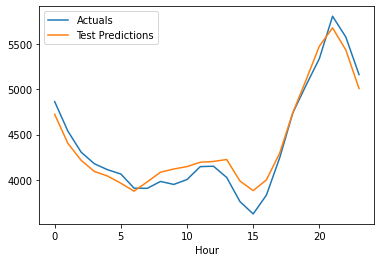

In [98]:
# summer sundays
deep2.loc[(deep2.Season==2) & (deep2['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

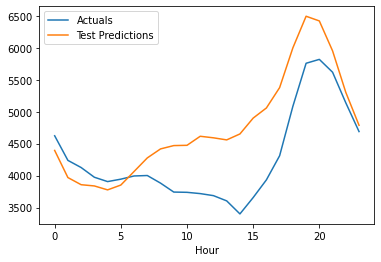

In [99]:
# spring sundays
deep2.loc[(deep2.Season==1) & (deep2['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

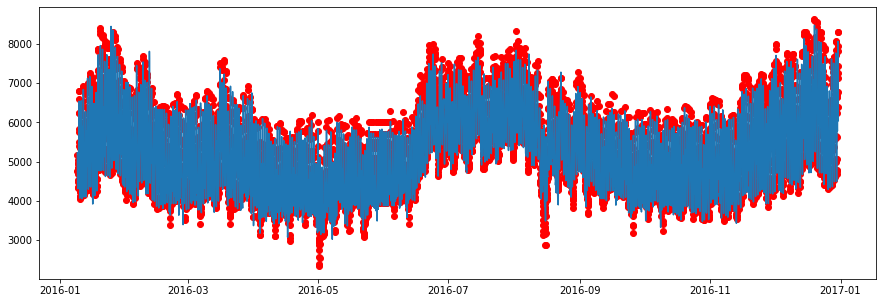

In [100]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index,test_results.Actuals,color='r')
fig = plt.plot(test_results['Test Predictions'])

In [101]:
deep_cnn_lstm=deep2.copy()

In [102]:
deep_cnn_lstm = deep_cnn_lstm.reset_index()
deep_cnn_lstm

,Date,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
0,2016-01-09 00:00:00,5222.721680,5172,50.721680,2016,1,9,4,5,0
1,2016-01-09 01:00:00,4794.876953,4756,38.876953,2016,1,9,4,5,1
2,2016-01-09 02:00:00,4612.139648,4680,67.860352,2016,1,9,4,5,2
3,2016-01-09 03:00:00,4457.208008,4482,24.791992,2016,1,9,4,5,3
4,2016-01-09 04:00:00,4319.224609,4334,14.775391,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,8064.922363,8302,237.077637,2016,12,30,4,4,19
8564,2016-12-30 20:00:00,7714.501465,7941,226.498535,2016,12,30,4,4,20
8565,2016-12-30 21:00:00,7097.488281,7269,171.511719,2016,12,30,4,4,21
8566,2016-12-30 22:00:00,6435.101562,6776,340.898438,2016,12,30,4,4,22


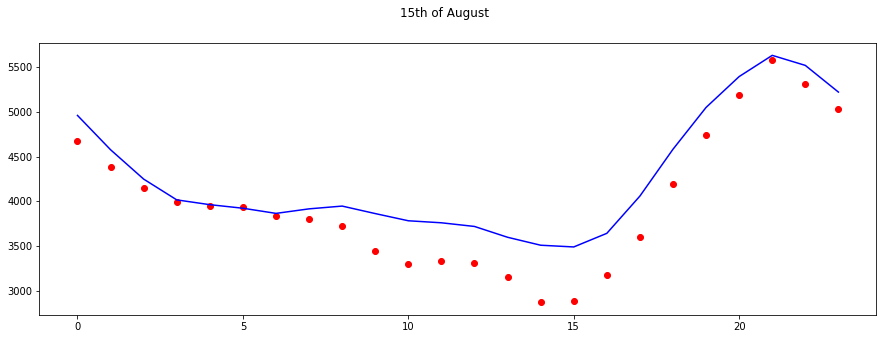

In [103]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter([i for i in range(0,24)],deep_cnn_lstm.iloc[5256:5280]['Actuals'], color='r')
fig = plt.plot([i for i in range(0,24)],deep_cnn_lstm.iloc[5256:5280]['Test Predictions'],color='b')
#ax.set_xbound(lower=res.iloc[5256]['Hour'],upper=res.iloc[5279]['Hour'])
plot = plt.suptitle('15th of August')

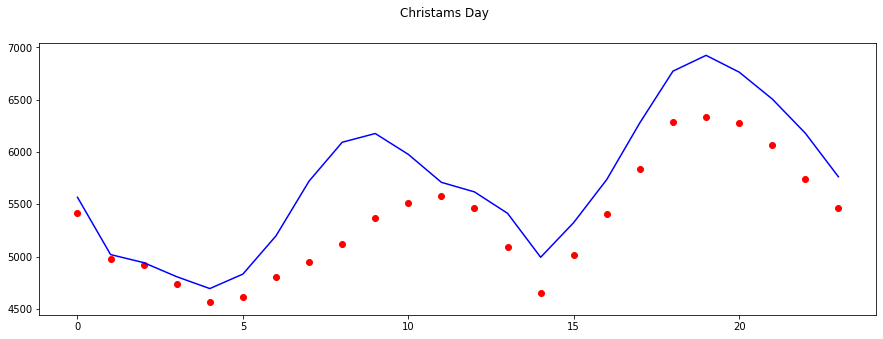

In [104]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter([i for i in range(0,24)],deep_cnn_lstm.iloc[8424:8448]['Actuals'], color='r')
fig = plt.plot([i for i in range(0,24)],deep_cnn_lstm.iloc[8424:8448]['Test Predictions'],color='b')
#ax.set_xbound(lower=deep_cnn_lstm.iloc[8424]['Hour'],upper=deep_cnn_lstm.iloc[8447]['Hour'])
plot = plt.suptitle('Christams Day')

In [105]:
mae_cnn_lstm = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])
mae_cnn_lstm

217.53914861029048

In [106]:
savedModel3=load_model(os.path.join('/content/drive/MyDrive/models','CONV-LSTM.h5'))
savedModel3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 12, 64)         60928     
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 768)           0         
 or)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 1, 200)            775200    
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 100)           20100     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 1)            

In [107]:
n_steps = 2 
n_length = 12
n_features = X_train.shape[2]

In [108]:
# reshape into subsequences [samples, timesteps, rows, cols, channels]
X_test = X_test.reshape((X_test.shape[0], n_steps, 1, n_length, n_features))

In [109]:
test_predictions = savedModel3.predict(X_test)
test_predictions

268/268 [==============================] - 2s 5ms/step


array([[[5150.3394]],

       [[4782.923 ]],

       [[4705.643 ]],

       ...,

       [[6923.0137]],

       [[6459.834 ]],

       [[6113.2563]]], dtype=float32)

In [110]:
X_test.shape

(8568, 2, 1, 12, 15)

In [111]:
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.flatten(), 'Actuals':y_test.flatten()})
test_results

,Test Predictions,Actuals
0,5150.339355,5172
1,4782.922852,4756
2,4705.643066,4680
3,4489.029785,4482
4,4300.271973,4334
...,...,...
8563,7919.852051,8302
8564,7540.175781,7941
8565,6923.013672,7269
8566,6459.833984,6776


In [112]:
#test_results = test_results.drop('Date',axis=1)
test_results['Date'] = pd.date_range(start='2016-1-09',end='2016-12-31',freq='H')[:-1]
test_results


,Test Predictions,Actuals,Date
0,5150.339355,5172,2016-01-09 00:00:00
1,4782.922852,4756,2016-01-09 01:00:00
2,4705.643066,4680,2016-01-09 02:00:00
3,4489.029785,4482,2016-01-09 03:00:00
4,4300.271973,4334,2016-01-09 04:00:00
...,...,...,...
8563,7919.852051,8302,2016-12-30 19:00:00
8564,7540.175781,7941,2016-12-30 20:00:00
8565,6923.013672,7269,2016-12-30 21:00:00
8566,6459.833984,6776,2016-12-30 22:00:00


In [149]:
test_results.loc['2016-01-10 00:00:00']

Test Predictions    4842.690918
Actuals             4920.000000
diff                  77.309082
Name: 2016-01-10 00:00:00, dtype: float64

In [113]:
test_results.set_index('Date',inplace=True)
test_results

,Test Predictions,Actuals
Date,,
2016-01-09 00:00:00,5150.339355,5172
2016-01-09 01:00:00,4782.922852,4756
2016-01-09 02:00:00,4705.643066,4680
2016-01-09 03:00:00,4489.029785,4482
2016-01-09 04:00:00,4300.271973,4334
...,...,...
2016-12-30 19:00:00,7919.852051,8302
2016-12-30 20:00:00,7540.175781,7941
2016-12-30 21:00:00,6923.013672,7269


In [114]:
test_results['diff']=(test_results['Test Predictions']-test_results['Actuals']).abs()

In [115]:
deep3 = pd.merge(test_results,meta_test,on=test_results.index)
deep3

,key_0,Test Predictions,Actuals,diff,actual,Year,Month,Day,Season,Week Day,Date
0,2016-01-09 00:00:00,5150.339355,5172,21.660645,5172,2016,1,9,4,5,2016-01-09
1,2016-01-09 01:00:00,4782.922852,4756,26.922852,4756,2016,1,9,4,5,2016-01-09
2,2016-01-09 02:00:00,4705.643066,4680,25.643066,4680,2016,1,9,4,5,2016-01-09
3,2016-01-09 03:00:00,4489.029785,4482,7.029785,4482,2016,1,9,4,5,2016-01-09
4,2016-01-09 04:00:00,4300.271973,4334,33.728027,4334,2016,1,9,4,5,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,7919.852051,8302,382.147949,8302,2016,12,30,4,4,2016-12-30
8564,2016-12-30 20:00:00,7540.175781,7941,400.824219,7941,2016,12,30,4,4,2016-12-30
8565,2016-12-30 21:00:00,6923.013672,7269,345.986328,7269,2016,12,30,4,4,2016-12-30
8566,2016-12-30 22:00:00,6459.833984,6776,316.166016,6776,2016,12,30,4,4,2016-12-30


In [116]:
deep3.drop(columns=['actual','Date'],axis=1,inplace=True)

In [117]:
deep3.rename(columns={'key_0':'Date'},inplace=True)

In [118]:
deep3['Hour']=deep3['Date'].dt.hour

In [119]:
deep3.set_index('Date',inplace=True)
deep3

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 00:00:00,5150.339355,5172,21.660645,2016,1,9,4,5,0
2016-01-09 01:00:00,4782.922852,4756,26.922852,2016,1,9,4,5,1
2016-01-09 02:00:00,4705.643066,4680,25.643066,2016,1,9,4,5,2
2016-01-09 03:00:00,4489.029785,4482,7.029785,2016,1,9,4,5,3
2016-01-09 04:00:00,4300.271973,4334,33.728027,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,7919.852051,8302,382.147949,2016,12,30,4,4,19
2016-12-30 20:00:00,7540.175781,7941,400.824219,2016,12,30,4,4,20
2016-12-30 21:00:00,6923.013672,7269,345.986328,2016,12,30,4,4,21


In [120]:
deep3[deep3['diff']>100]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 05:00:00,4261.241699,4366,104.758301,2016,1,9,4,5,5
2016-01-09 06:00:00,4363.207520,4523,159.792480,2016,1,9,4,5,6
2016-01-09 07:00:00,4586.245117,4770,183.754883,2016,1,9,4,5,7
2016-01-09 08:00:00,4752.222168,4978,225.777832,2016,1,9,4,5,8
2016-01-09 10:00:00,5236.209473,4940,296.209473,2016,1,9,4,5,10
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,7919.852051,8302,382.147949,2016,12,30,4,4,19
2016-12-30 20:00:00,7540.175781,7941,400.824219,2016,12,30,4,4,20
2016-12-30 21:00:00,6923.013672,7269,345.986328,2016,12,30,4,4,21


mae>100=67.17%

In [121]:
deep3[deep3['diff']>200]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 08:00:00,4752.222168,4978,225.777832,2016,1,9,4,5,8
2016-01-09 10:00:00,5236.209473,4940,296.209473,2016,1,9,4,5,10
2016-01-09 11:00:00,5450.247559,4845,605.247559,2016,1,9,4,5,11
2016-01-09 12:00:00,5583.429688,4850,733.429688,2016,1,9,4,5,12
2016-01-09 13:00:00,5530.953613,4978,552.953613,2016,1,9,4,5,13
...,...,...,...,...,...,...,...,...,...
2016-12-30 19:00:00,7919.852051,8302,382.147949,2016,12,30,4,4,19
2016-12-30 20:00:00,7540.175781,7941,400.824219,2016,12,30,4,4,20
2016-12-30 21:00:00,6923.013672,7269,345.986328,2016,12,30,4,4,21


mae>200=40,91%

In [122]:
deep3[deep3['diff']>300]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 11:00:00,5450.247559,4845,605.247559,2016,1,9,4,5,11
2016-01-09 12:00:00,5583.429688,4850,733.429688,2016,1,9,4,5,12
2016-01-09 13:00:00,5530.953613,4978,552.953613,2016,1,9,4,5,13
2016-01-09 14:00:00,5280.929199,4967,313.929199,2016,1,9,4,5,14
2016-01-09 17:00:00,5930.737793,6242,311.262207,2016,1,9,4,5,17
...,...,...,...,...,...,...,...,...,...
2016-12-30 18:00:00,7928.455566,8299,370.544434,2016,12,30,4,4,18
2016-12-30 19:00:00,7919.852051,8302,382.147949,2016,12,30,4,4,19
2016-12-30 20:00:00,7540.175781,7941,400.824219,2016,12,30,4,4,20


mae>300=25,92%

In [123]:
deep3[deep3['diff']>400]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 11:00:00,5450.247559,4845,605.247559,2016,1,9,4,5,11
2016-01-09 12:00:00,5583.429688,4850,733.429688,2016,1,9,4,5,12
2016-01-09 13:00:00,5530.953613,4978,552.953613,2016,1,9,4,5,13
2016-01-10 07:00:00,4726.071777,4243,483.071777,2016,1,10,4,6,7
2016-01-10 08:00:00,5115.436523,4423,692.436523,2016,1,10,4,6,8
...,...,...,...,...,...,...,...,...,...
2016-12-30 14:00:00,5757.713379,6647,889.286621,2016,12,30,4,4,14
2016-12-30 15:00:00,6265.108398,7125,859.891602,2016,12,30,4,4,15
2016-12-30 16:00:00,6822.061523,7435,612.938477,2016,12,30,4,4,16


mae>400=15,50%

In [124]:
deep3[deep3['diff']>500]

,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
Date,,,,,,,,,
2016-01-09 11:00:00,5450.247559,4845,605.247559,2016,1,9,4,5,11
2016-01-09 12:00:00,5583.429688,4850,733.429688,2016,1,9,4,5,12
2016-01-09 13:00:00,5530.953613,4978,552.953613,2016,1,9,4,5,13
2016-01-10 08:00:00,5115.436523,4423,692.436523,2016,1,10,4,6,8
2016-01-10 09:00:00,5483.660645,4847,636.660645,2016,1,10,4,6,9
...,...,...,...,...,...,...,...,...,...
2016-12-30 12:00:00,5735.524414,6654,918.475586,2016,12,30,4,4,12
2016-12-30 13:00:00,5781.966797,6684,902.033203,2016,12,30,4,4,13
2016-12-30 14:00:00,5757.713379,6647,889.286621,2016,12,30,4,4,14


mae>500=8,42%

In [125]:
a = deep3.groupby(['Season'])
a.first()

,Test Predictions,Actuals,diff,Year,Month,Day,Week Day,Hour
Season,,,,,,,,
1,4516.060547,4514,2.060547,2016,3,1,1,0
2,4543.755859,4631,87.244141,2016,6,1,2,0
3,5565.887695,5791,225.112305,2016,9,1,3,0
4,5150.339355,5172,21.660645,2016,1,9,5,0


<AxesSubplot:xlabel='Season'>

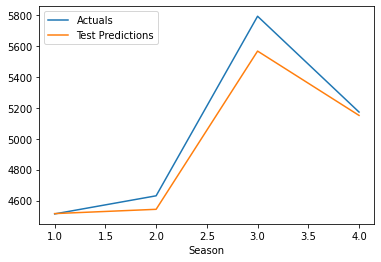

In [126]:
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

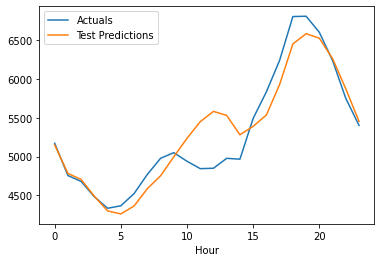

In [127]:
a = deep3.groupby('Hour')
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Week Day'>

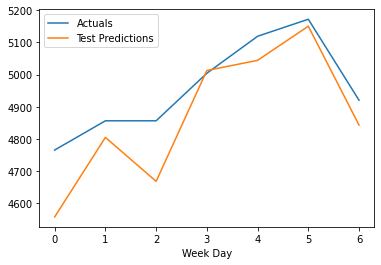

In [128]:
a = deep3.groupby('Week Day')
a.first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

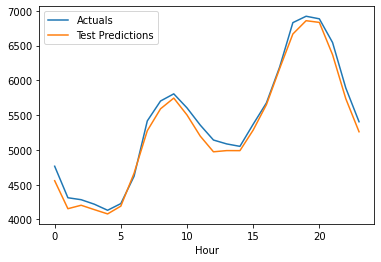

In [129]:
#winter weakday
deep3.loc[(deep3.Season==4) & ((deep3['Week Day']==0) | (deep3['Week Day'] ==1) | (deep3['Week Day'] ==2) | (deep3['Week Day'] ==3) | (deep3['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

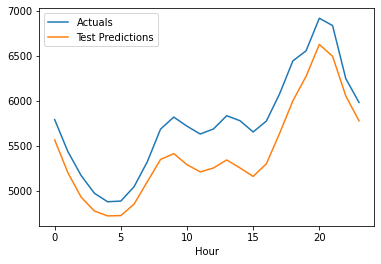

In [130]:
# autumn weakday
deep3.loc[(deep3.Season==3) & ((deep3['Week Day']==0) | (deep3['Week Day'] ==1) | (deep3['Week Day'] ==2) | (deep3['Week Day'] ==3) | (deep3['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

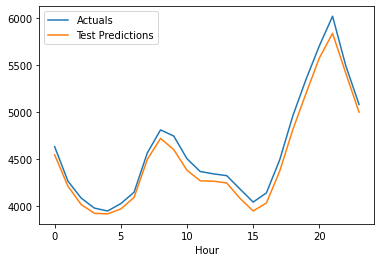

In [131]:
# summer weekday
deep3.loc[(deep3.Season==2) & ((deep3['Week Day']==0) | (deep3['Week Day'] ==1) | (deep3['Week Day'] ==2) | (deep3['Week Day'] ==3) | (deep3['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

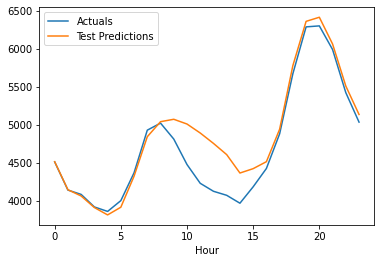

In [132]:
# spring weekday
deep3.loc[(deep3.Season==1) & ((deep3['Week Day']==0) | (deep3['Week Day'] ==1) | (deep3['Week Day'] ==2) | (deep3['Week Day'] ==3) | (deep3['Week Day'] ==4)) ].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

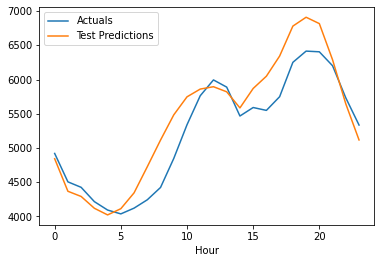

In [133]:
# winter sundays
deep3.loc[(deep3.Season==4) & (deep3['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

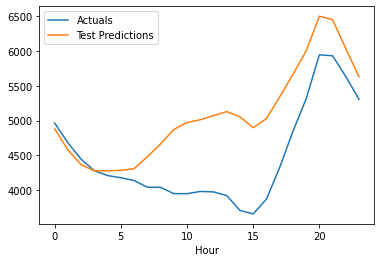

In [134]:
# autumn sundays
deep3.loc[(deep3.Season==3) & (deep3['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

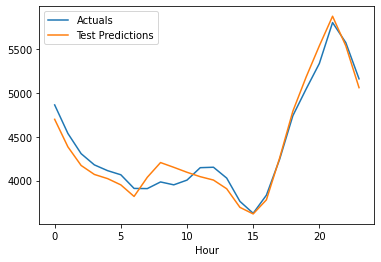

In [135]:
# summer sundays
deep3.loc[(deep3.Season==2) & (deep3['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

<AxesSubplot:xlabel='Hour'>

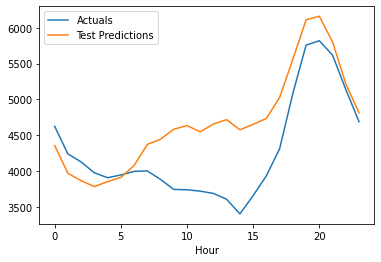

In [136]:
# spring sundays
deep3.loc[(deep3.Season==1) & (deep3['Week Day']==6)].groupby(['Hour']).first()[['Actuals','Test Predictions']].plot()

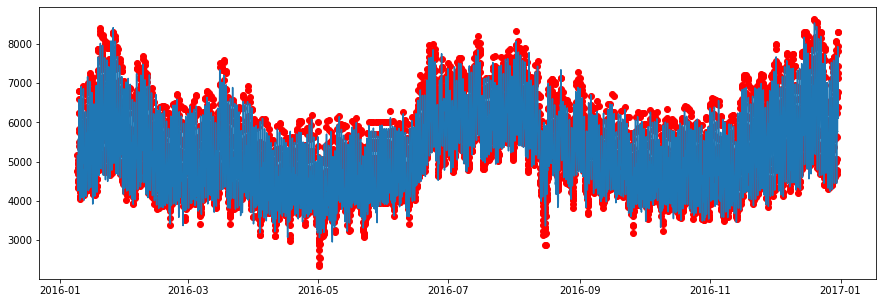

In [137]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test_results.index,test_results.Actuals,color='r')
fig = plt.plot(test_results['Test Predictions'])

In [138]:
deep_conv_lstm=deep3.copy()

In [139]:
deep_conv_lstm = deep_conv_lstm.reset_index()
deep_conv_lstm

,Date,Test Predictions,Actuals,diff,Year,Month,Day,Season,Week Day,Hour
0,2016-01-09 00:00:00,5150.339355,5172,21.660645,2016,1,9,4,5,0
1,2016-01-09 01:00:00,4782.922852,4756,26.922852,2016,1,9,4,5,1
2,2016-01-09 02:00:00,4705.643066,4680,25.643066,2016,1,9,4,5,2
3,2016-01-09 03:00:00,4489.029785,4482,7.029785,2016,1,9,4,5,3
4,2016-01-09 04:00:00,4300.271973,4334,33.728027,2016,1,9,4,5,4
...,...,...,...,...,...,...,...,...,...,...
8563,2016-12-30 19:00:00,7919.852051,8302,382.147949,2016,12,30,4,4,19
8564,2016-12-30 20:00:00,7540.175781,7941,400.824219,2016,12,30,4,4,20
8565,2016-12-30 21:00:00,6923.013672,7269,345.986328,2016,12,30,4,4,21
8566,2016-12-30 22:00:00,6459.833984,6776,316.166016,2016,12,30,4,4,22


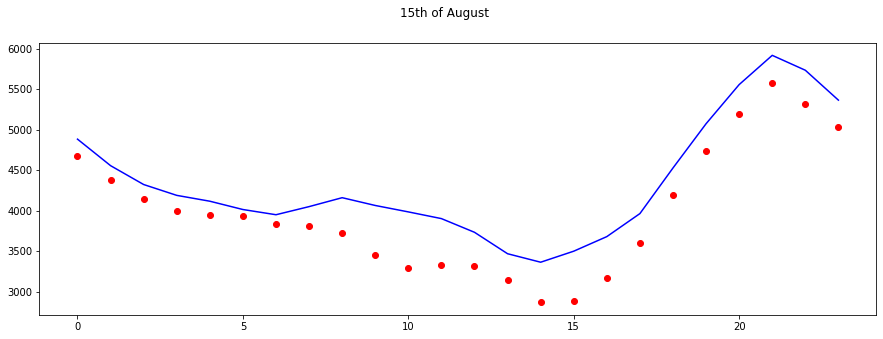

In [140]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter([i for i in range(0,24)],deep_conv_lstm.iloc[5256:5280]['Actuals'], color='r')
fig = plt.plot([i for i in range(0,24)],deep_conv_lstm.iloc[5256:5280]['Test Predictions'],color='b')
#ax.set_xbound(lower=res.iloc[5256]['Hour'],upper=res.iloc[5279]['Hour'])
plot = plt.suptitle('15th of August')

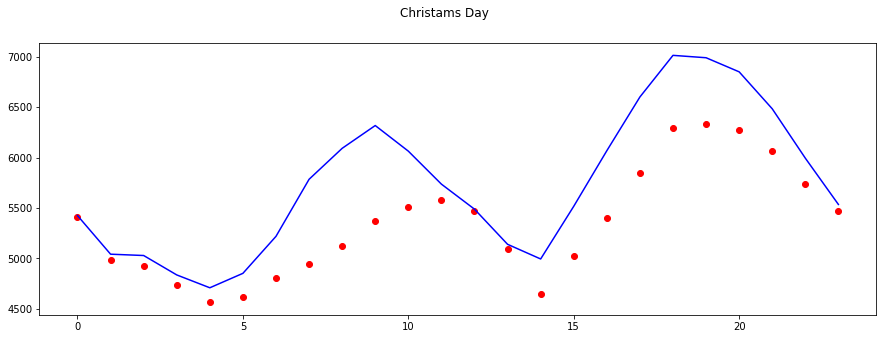

In [141]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter([i for i in range(0,24)],deep_conv_lstm.iloc[8424:8448]['Actuals'], color='r')
fig = plt.plot([i for i in range(0,24)],deep_conv_lstm.iloc[8424:8448]['Test Predictions'],color='b')
#ax.set_xbound(lower=deep_conv_lstm.iloc[8424]['Hour'],upper=deep_conv_lstm.iloc[8447]['Hour'])
plot = plt.suptitle('Christams Day')

In [142]:
mae_conv_lstm = mean_absolute_error(test_results["Test Predictions"], test_results["Actuals"])
mae_conv_lstm

215.38597886257367

In [143]:
maes = [mae_lstm,mae_cnn_lstm,mae_conv_lstm]
maes

[184.26980385660124, 217.53914861029048, 215.38597886257367]

In [144]:
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(x[i],y[i],s=y[i],ha='center',color='r')

In [145]:
x=['LSTM','CNN-LSTM','CONV-LSTM']
y = [184.27,217.54,215.39]

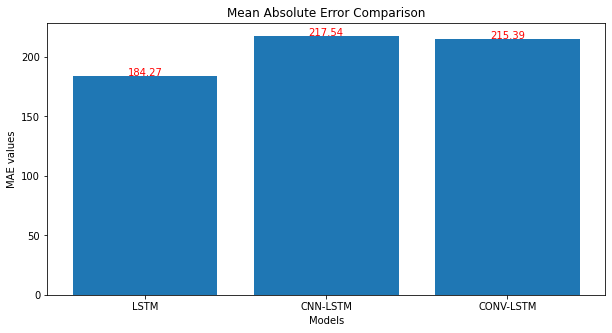

In [146]:
plt.figure(figsize=(10,5))
plt.bar(x,y)
addlabels(x,y)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Models')
plt.ylabel('MAE values')
plt.show()